In [ ]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Load the dataset from CSV
data = pd.read_csv('/content/FinancialMarket.csv')

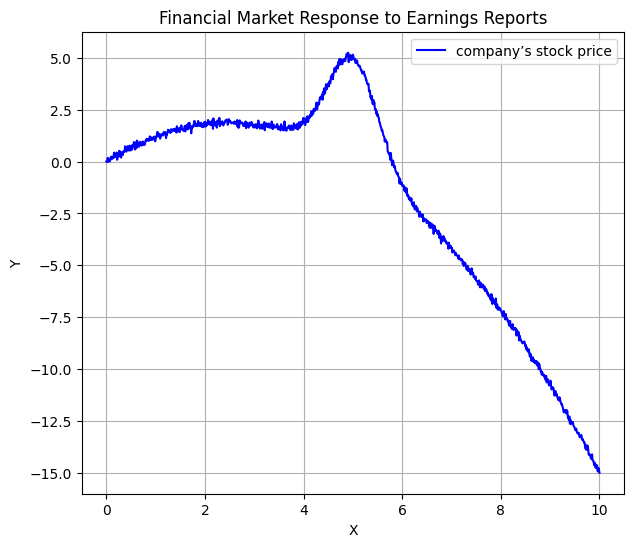

In [ ]:
# Extract the x and combined data columns
x = data['x'].values
combined_data = data['combined_data'].values

# Step 3: Visualize the dataset
plt.figure(figsize=(7, 6))

# Plot the combined data
plt.plot(x, combined_data, label='company’s stock price', color='blue')

# Add labels and title
plt.title('Financial Market Response to Earnings Reports')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()  # Ensure there's a label to show in the legend

# Display the plot
plt.show()

In [ ]:
# Memuat dataset (X sebagai variabel independen, Y sebagai variabel dependen)
X = data['x'].values
Y = data['combined_data'].values

# Reshape X agar sesuai dengan format input model
X_reshaped = X.reshape(-1, 1)

In [ ]:
# 1. Vanilla Linear Regression (Regresi Linier Sederhana)
linear_model = LinearRegression()
linear_model.fit(X_reshaped, Y)
Y_pred_linear = linear_model.predict(X_reshaped)

In [ ]:

# 2. Linear Regression dengan Basis Fungsi RBF
# Menggunakan RBFSampler untuk mengubah fitur ke basis RBF
rbf_sampler = RBFSampler(gamma=0.1, n_components=100, random_state=42)  # gamma mengontrol lebar RBF
X_rbf = rbf_sampler.fit_transform(X_reshaped)

# Menerapkan regresi linier pada fitur yang telah diubah menggunakan basis RBF
linear_rbf_model = LinearRegression()
linear_rbf_model.fit(X_rbf, Y)
Y_pred_linear_rbf = linear_rbf_model.predict(X_rbf)

In [ ]:
# Evaluasi model Vanilla Regression
mse_linear = mean_squared_error(Y, Y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(Y, Y_pred_linear)
r2_linear = r2_score(Y, Y_pred_linear)

# Evaluasi model RBF Regression
mse_linear_rbf = mean_squared_error(Y, Y_pred_linear_rbf)
rmse_linear_rbf = np.sqrt(mse_linear_rbf)
mae_linear_rbf = mean_absolute_error(Y, Y_pred_linear_rbf)
r2_linear_rbf = r2_score(Y, Y_pred_linear_rbf)

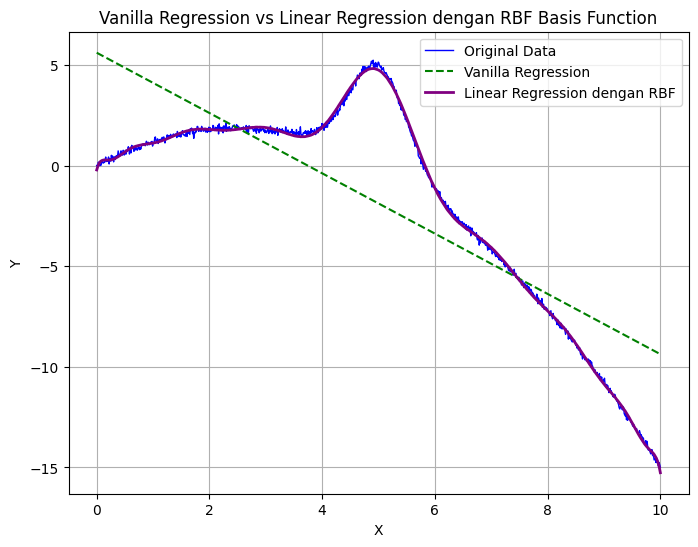

In [ ]:
# Plotting kedua model untuk perbandingan
plt.figure(figsize=(8, 6))

# Plot data asli
plt.plot(X, Y, label="Original Data", color='blue', linewidth=1)

# Plot vanilla regression
plt.plot(X, Y_pred_linear, label="Vanilla Regression", linestyle='--', color='green')

# Plot RBF-transformed linear regression
plt.plot(X, Y_pred_linear_rbf, label="Linear Regression dengan RBF", color='purple', linewidth=2)

# Tambahkan judul, label, dan legenda
plt.title("Vanilla Regression vs Linear Regression dengan RBF Basis Function")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)

# Tampilkan plot
plt.show()

In [ ]:
# Menampilkan hasil evaluasi Vanilla Regression
print("Evaluasi Vanilla Regression:")
print(f"MSE: {mse_linear}, RMSE: {rmse_linear}, MAE: {mae_linear}, R2: {r2_linear}")

# Menampilkan hasil evaluasi Linear Regression dengan RBF
print("\nEvaluasi Linear Regression dengan RBF:")
print(f"MSE: {mse_linear_rbf}, RMSE: {rmse_linear_rbf}, MAE: {mae_linear_rbf}, R2: {r2_linear_rbf}")

Evaluasi Vanilla Regression:
MSE: 9.887619132900994, RMSE: 3.144458480072681, MAE: 2.5011602349029554, R2: 0.6547481050711528

Evaluasi Linear Regression dengan RBF:
MSE: 0.021268194971180036, RMSE: 0.1458361922541179, MAE: 0.11779540089210579, R2: 0.9992573657503572
